In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition, manifold

In [28]:
# 使用sklearn自带的鸢尾花分类数据
def load_data():
    iris = datasets.load_iris()
    return iris.data,iris.target

In [29]:
def test_PCA(*data):
    x,y = data
    pca = decomposition.PCA()
    pca.fit(x)
    # explained_variance_ratio_：返回所保留的n个成分各自的方差百分比。
    print('explained variance ratio :{0}'.format(pca.explained_variance_ratio_))


In [30]:
# 测试 显示各特征占比
x,y = load_data()
test_PCA(x,y)

explained variance ratio :[0.92461621 0.05301557 0.01718514 0.00518309]


In [31]:
# 根据上面的结果 将数据降低至2维
def plot_PCA(*data):
    x,y = data
    pca = decomposition.PCA(n_components=2)
    pca.fit(x)
    x_r = pca.transform(x)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    colors=((1,0,0),(0,1,0),(0,0,1))
    for label,color in zip(np.unique(y),colors):
        position =y==label
        ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
    ax.set_xlabel('X[0]')
    ax.set_ylabel('Y[0]')
    ax.legend(loc='best')
    ax.set_title('PCA')
    plt.show()

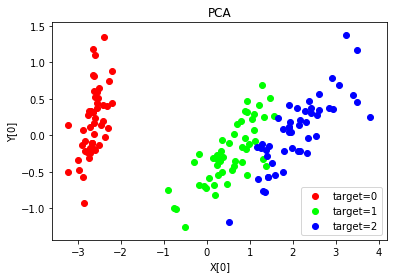

In [32]:
# 测试
x,y = load_data()
plot_PCA(x,y)

In [26]:
# 降至1维试试
def plot_PCA_1(*data):
    x,y = data
    pca = decomposition.PCA(n_components=1)
    pca.fit(x)
    x_r = pca.transform(x)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    colors=((1,0,0),(0,1,0),(0,0,1))
    for label,color in zip(np.unique(y),colors):
        position =y==label
        ax.scatter(x_r[position,0],[1 for i in x_r[position,0]],label='target={0}'.format(label),color=color)
    
    ax.set_xlabel('X[0]')
    ax.set_ylabel('Y[0]')
    ax.legend(loc='best')
    ax.set_title('PCA')
    plt.show()

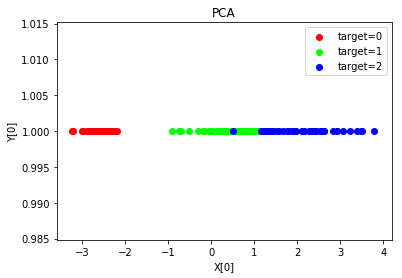

In [27]:
# 测试
x,y = load_data()
plot_PCA_1(x,y)

In [10]:
# decomposition.PCA 需要一次性将数据加载在内存中，所以不适合大规模数据
# 超大规模数据的情况下使用： 用法与PCA一致
decomposition.IncrementalPCA 

sklearn.decomposition.incremental_pca.IncrementalPCA